In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg

font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

## The Ornstein-Uhlenbeck process

\begin{eqnarray}
    dx_t= - k (x_t - x_e)\,dt+\sigma \,dW_t \, 
\end{eqnarray}

In [2]:
# Ornstein-Uhlenbeck parameters
k     = 1
xe    = 3
sigma = 1


In [3]:
# Grid
xbins     = 100   
xmin      = - 2
xmax      = - xmin
xedges    = np.linspace(xmin, xmax, xbins)  # array with x edges
dx        = xedges[1] - xedges[0]
xcenters  = xedges[:-1] + (dx / 2)                # array with x centers
xbins     = xbins - 1


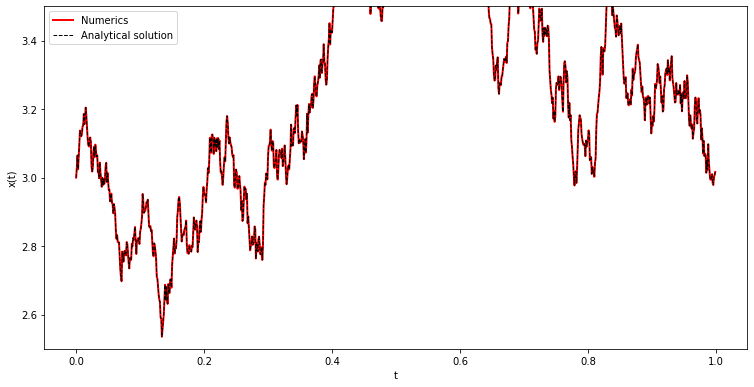

In [4]:
# Integration step
dt  = 0.001
sdt = np.sqrt(dt)

# Number of steps
N  = 1000

# Time intervals
t  = np.linspace(0, N-1, N) * dt

x0 = 3
x = np.zeros(N)
x[0] = x0

y = np.zeros(N)
y[0] = x0

# Generate random numbers
eta    = np.random.normal(0,1,N)

for i in range(N-1):

    # Euler-Maruyama scheme
    x[i+1]  = x[i] - k * ( x[i] - xe ) * dt + sigma * eta[i] * sdt

    # Analytical solution
    y[i+1]  = xe + np.exp( - k * t[i] ) * ( x0 - xe ) + sigma * np.sum( sdt * eta[0:i+1] * np.exp( - k * ( t[i] - t[0:i+1] ) ) )

fig, ax = plt.subplots(1, 1,figsize=(32*in2cm, 16*in2cm))  

ax.plot(t, x, 'r',   label='Numerics', linewidth = 2)
ax.plot(t, y, 'k--', label='Analytical solution', linewidth = 1)
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_ylim(x0-0.5, x0+0.5)
ax.legend();